## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests 


<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
len(df)

294478

In [4]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

c. The number of unique users in the dataset.

In [5]:
len(np.unique(df['user_id']))

290584

In [6]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


d. The proportion of users converted.

In [7]:
uniq_users = len(np.unique(df['user_id']))
converts = df.query('converted == 1')
uniq_converts = len(np.unique(converts['user_id']))
conversion_proportion = uniq_converts/uniq_users
print(conversion_proportion)

0.12104245244060237


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
mismatch = df.query('group == "treatment" and landing_page == "old_page" or group =="control" and landing_page == "new_page"')
len(mismatch)

3893

f. Do any of the rows have missing values?

In [9]:
# No row in the dataframe df has a missing value.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [10]:
df2 = df.query('group == "treatment" and landing_page != "old_page" or group =="control" and landing_page != "new_page"')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
len(np.unique(df2['user_id']))

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# The user_id that == 773192 is repeat twice
df2['user_id'].value_counts().head()

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop(1899)

In [16]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
len_users2 = len(np.unique(df2['user_id']))
converts2 = df2.query('converted == 1')
len_converts = len(np.unique(converts2['user_id']))
conversion_prob = len_converts/len_users2
print(conversion_prob)

0.11959708724499628


In [18]:
print(len_users2)

290584


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
control = df2.query('group == "control"')
len_c_users = len(np.unique(control['user_id']))
control_converts = control.query('converted ==1')
len_c_converts = len(np.unique(control_converts['user_id']))
control_prob = len_c_converts/len_c_users
print(control_prob)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treatment = df2.query('group == "treatment"')
len_t_users = len(np.unique(treatment['user_id']))
treatment_converts = treatment.query('converted ==1')
len_t_converts = len(np.unique(treatment_converts['user_id']))
treatment_prob = len_t_converts/len_t_users
print(treatment_prob)

0.11880806551510564


In [21]:
treatment_dif = treatment_prob - control_prob
print(treatment_dif)

-0.0015782389853555567


d. What is the probability that an individual received the new page?

In [22]:
# object len_users2 came from above cells
new_landing = df2.query('landing_page == "new_page"')
len_nlanding = len(np.unique(new_landing['user_id']))
prob_nlanding = len_nlanding/len_users2 
print(prob_nlanding)

0.5000619442226688


*The evidence provided in the cells above is not suffificient to prove that the new_page landing leads to more conversion. Users who landed on the old_page had a +.0015 percent higher conversion rate than the new_page.*

<a id='ab_test'></a>
### Part II - A/B Test
* Alpha= 5%, 
* If $  p < alpha$ , reject the null , choose $H1$
* If $ p > alpha$ , fail to reject the null, choose $H0$


* Null Hypothesis: <b>P_new is $<=$ P_old</b>
* Alternative Hypothesis: <b>P_new is $>$ P_old</b>

`2.` *We assume that under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page.* <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
0.1196

0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
0.1196

0.1196

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new = len(np.unique(treatment['user_id']))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = len(np.unique(control['user_id']))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([0, 1], size=145310, p=[0.8804, 0.1196])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([0, 1], size=145274, p=[0.8804, 0.1196])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
p_new = new_page_converted.sum() / n_new
p_old = old_page_converted.sum() / n_old
p_new - p_old

-0.0010138565758942009

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
p_diffs = []
for _ in tqdm(range(10000)):
        new_page_converted = np.random.choice([0, 1], size=n_new, p=[0.8804, 0.1196])
        old_page_converted = np.random.choice([0, 1], size=n_old, p=[0.8804, 0.1196])
        p_new = new_page_converted.sum() / n_new
        p_old = old_page_converted.sum() / n_old
        p_diffs.append(p_new - p_old)

100%|██████████| 10000/10000 [01:04<00:00, 154.91it/s]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

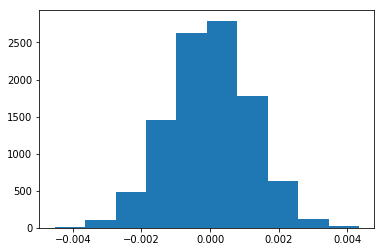

In [31]:
plt.hist(p_diffs);

In [32]:
p_diffs = np.array(p_diffs)
p_norm = np.random.normal(0, p_diffs.std(), p_diffs.size )

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
(p_diffs > treatment_dif).mean()

0.90710000000000002

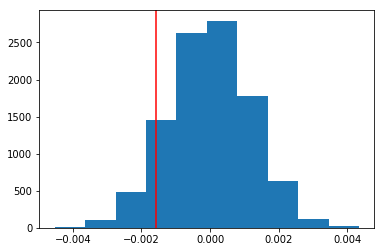

In [34]:
plt.hist(p_diffs)
plt.axvline(x=treatment_dif, color='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*A p-value of .906 suggests that in this hypothesis test, we fail to reject the null. The significance level of the AB Test was set at an alpha = 0.05 which means that the test allows for a 5% chance of resulting in a Type I error. For any value above our alpha, we could not reject the null hypothesis. The p-value of 0.906 which is a much higher value than the alpha. With a great deal of certainty, we fail to reject the null hypothesis and find that the old_page has a higher or equal conversion rate than the new_page.*

Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
#
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_new = df2.query('landing_page == "new_page"').user_id.nunique()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [54]:
import statsmodels.stats.proportion as sm

z_score, p_value = sm.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
z_score, p_value 

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*The z-score is -1.31 which represents the number of standard deviations under the sample distribution of the null hypothesis, from our observed value, we find that the new_page conversion rate is one and a third standard deviations below the observed value of the null hypothesis (conversion value of the old_page).  With a one-tailed test at alpha = 0.05 our threshold to reject the null hypothesis we would need a critical value of z-score = 1.645.  The value we got falls -2.655 standard deviations below this value.* 

*The p-score is .905, and it is the level of significance of a hypothesis test that represents the lowest region at which a hypothesis test would be rejected. If the p-value is lower than the test significance, in this case alpha = 0.05, we would reject the null hypothesis and conclude a significant difference.  However in this hypothesis test the p-value is much larger 0.905 > 0.05, which indicates that the evidence to reject the null hypothesis is very weak, so we fail to reject the null.*

Both the z-test and the p-value confirm that the null hypothesis has failed to be rejected and that the new page does not have a greater conversion rate than the old page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

*Our test evaluates the liklihood of a conversion or no conversion, with the landing page as the independent variables. This test requires a **Logistic Regression** because our dependent variable of conversion or no conversion is categorical.*

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
df2['intercept'] = 1

In [39]:
dummy = pd.get_dummies(df2['landing_page'])
dummy = dummy.drop(columns=['old_page'])
df2['ab_page'] = dummy
df2.rename({'new_page' : 'ab_page'}, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [55]:
import statsmodels.discrete.discrete_model as sm
model = sm.Logit(endog=df2['converted'] , exog=df2[['intercept','ab_page']] )
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:               8.077e-06
Time:                        03:04:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

*The p-value here is alpha = (.05) /2, because this test of the hypthesis is a two-tailed test unlike Part II that was a one-tailed hypothesis test.  The p-value region of which there is strong evidence to reject the null is lowered in a two-tailed test and the rejection value is a p of .025 at each end of the sample distribution. The result of our logistic regression found a p-value of 0.190 for the ab_page.  The p-value of .190 is much greater than .025 and this indicates that there is weak evidence to reject the null hypothesis and that fail to reject the null.  Our test indicates that the old page and the new page conversion rates are equal.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*By understanding the domain of the question being asked, important factors can be captured in the model and increase value for r-squared, the predictive power of the regression. However, it is always import to be aware that add more terms to the model does not always lead to signifcant prediction improvements*.

*As you add terms to the regression model the addition of terms will increase the likelihood of overfitting the model. The correlation coefficient of the model as a whole will increase even if the new terms do not add significant value to the model. Addition problems arises from multicollinearity when variables that are highly correlated to eachother are added to a multiple regression model.*

*A key measurement used to evaluate a was a variable adds value is to pay close attention to the standard deviation of the variable.  If a standard deviation is larger than the coefficient, this indicates that the variable provides more ambiguity than than predictive power to the model should be removed (with the exception of a small number of cases). Also by crosstesting the correlation of each predictive variable to eachother, multicollinearity can be avoided within the model.*

g. Now along with testing if the conversion rate changes for different pages, we will also add an effect based on which country a user lives in. **countries.csv** 

In [56]:
df_countries = pd.read_csv('./countries.csv')
df_countries = df2.merge(df_countries,on='user_id',how = 'inner')
df_countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [57]:
df_countries[['us','uk','ca']] = pd.get_dummies(df_countries['country'])


In [58]:
df_countries['intercept'] = 1

model2 = sm.Logit(df_countries['converted'], df_countries[['intercept', 'ab_page','uk','ca']] )
model_fit2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [59]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:               2.323e-05
Time:                        03:09:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
uk             0.0506      0.028      1.784      0.074      -0.005       0.106
ca             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

*The p-values of UK and CA, are much larger than the alpha = (0.5)/2, at a value of <b>.074</b> and <b>0.130</b> respectively. In this test we conclude that the conversion rate among users is not signifantly impacted by geographical region.*

h. We next look at the interaction between page and country to see if there significant effects on conversion.

In [60]:
df_countries["uk_page"] = df_countries["ab_page"]*df_countries["uk"]
df_countries["ca_page"] = df_countries["ab_page"]*df_countries["ca"]


In [61]:
df_countries['intercept'] = 1

#
model3 = sm.Logit(endog=df_countries['converted'],exog= df_countries[['intercept','ab_page',
                                                            'ca','uk','uk_page' ,'ca_page' ]])
#
model_fit3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [62]:
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:               3.482e-05
Time:                        03:09:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
ca             0.0175      0.038      0.465      0.642      -0.056       0.091
uk             0.0118      0.040      0.296      0.767      -0.066       0.090
uk_page        0.0783      0.057      1.378      0.168      -0.033       0.190
ca_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

*Again we find that the p-values of UK page and CA page, <b>.168</b> and <b>0.383</b> respectively, indicate weak evidence to reject the null hypothesis. Confirming that the conversion rate among users is not signifantly impacted by geographical region.*

<a id='conclusions'></a>
## Conclusions
*Based on the results of our AB test, we fail to reject the null hypothesis test at an alpha level of 0.05. Further supported with regression analysis, we come to two major conclusions.*
<ul><li><b>The new_page does not increase the coversion rate of a user<li><b>
The geographical origin of the user did not significantly influence a users conversion rate
    </b></li></ul>

*Our recommendation to the company would be to stay with the old page and do not implement the new page.*

References and Thanks to:
<ul><li>1.https://towardsdatascience.com/understanding-multiple-regression-249b16bde83e
<li>2.https://github.com/IamMohitM/Analyze-A-B-Test-Results/blob/master/Analyze_ab_test_results_notebook.ipynb
<li>3.https://github.com/seby-sbirna/Data-Analyst-Nanodegree-Project-Portfolio/tree/master/Project%203%20-%20Analyze%20AB%20Test%20Results
<li>4.httphttps://en.wikipedia.org/wiki/Z-testhttp://www.math.armstrong.edu/statsonline/5/5.3.2.html://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-confidence-intervals-and-confidence-levelshttps://en.wikipedia.org/wiki/Z-testhttp://www.math.armstrong.edu/statsonline/5/5.3.2.html
<li>5.https://en.wikipedia.org/wiki/Z-testhttp://www.math.armstrong.edu/statsonline/5/5.3.2.html
    <li>6.http://www.math.armstrong.edu/statsonline/5/5.3.2.html</li>
    </ul>